# 1. Import librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,auc,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# 2. Data Exploration

In [2]:
df_train = pd.read_csv("/Users/jennyferwan/Downloads/archive (1)/fraudTrain.csv")
df_test = pd.read_csv("/Users/jennyferwan/Downloads/archive (1)/fraudTest.csv")

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
print("Shape of df_train is {}".format(df_train.shape))
print("Shape of df_test is {}".format(df_test.shape))

print("Columns names of df_train is {}".format(df_train.columns))
print("Columns names  of df_test is {}".format(df_test.columns))

Shape of df_train is (1296675, 23)
Shape of df_test is (555719, 23)
Columns names of df_train is Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Columns names  of df_test is Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [4]:
# Set option to display all values
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675,648337,374318,0,324168,648337,972506,1296674
cc_num,1296675,417192042079726656,1308806447000240384,60416207185,180042946491150,3521417320836166,4642255475285942,4992346398065154048
amt,1296675,70,160,1,10,48,83,28949
zip,1296675,48801,26893,1257,26237,48174,72042,99783
lat,1296675,39,5,20,35,39,42,67
long,1296675,-90,14,-166,-97,-87,-80,-68
city_pop,1296675,88824,301956,23,743,2456,20328,2906700
unix_time,1296675,1349243637,12841278,1325376018,1338750742,1349249747,1359385376,1371816817
merch_lat,1296675,39,5,19,35,39,42,68
merch_long,1296675,-90,14,-167,-97,-87,-80,-67


In [5]:
# Detect null_values
null_values_train = df_train.isnull().sum()
null_values_test = df_test.isnull().sum()

null_values_concatenated = pd.concat([null_values_train, null_values_test], axis=1)
null_values_concatenated.columns = ['Null Values in df_train', 'Null Values in df_test']
null_values_concatenated


,Null Values in df_train,Null Values in df_test
Unnamed: 0,0,0
trans_date_trans_time,0,0
cc_num,0,0
merchant,0,0
category,0,0
amt,0,0
first,0,0
last,0,0
gender,0,0
street,0,0


In [6]:
# Check if duplicates rows in df_train
duplicates_df_train = df_train[df_train.duplicated()]
if duplicates_df_train.empty:
    print("There are no duplicates in the DataFrame.")
else:
    print("Duplicates have been found in the DataFrame:")
    print(duplicates_df_train)

There are no duplicates in the DataFrame.


In [7]:
# Dtypes of datasets
dtypes_train = df_train.dtypes
dtypes_test = df_test.dtypes

dtypes_concatenated = pd.concat([dtypes_train, dtypes_test], axis=1)
dtypes_concatenated.columns = ['Dtypes in df_train', 'Dtypes in df_test']
dtypes_concatenated

,Dtypes in df_train,Dtypes in df_test
Unnamed: 0,int64,int64
trans_date_trans_time,object,object
cc_num,int64,int64
merchant,object,object
category,object,object
amt,float64,float64
first,object,object
last,object,object
gender,object,object
street,object,object


## Data Cleaning

In [8]:
# Same as indexation
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
# Convert the relevant columns into datetime objects
df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_year'] = df_train['trans_date_trans_time'].dt.year
df_train['trans_month'] = df_train['trans_date_trans_time'].dt.month
df_train['trans_day'] = df_train['trans_date_trans_time'].dt.day
df_train['trans_hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['dob']=pd.to_datetime(df_train['dob'])
df_train['dob_year'] = df_train['dob'].dt.year
df_train['dob_month'] = df_train['dob'].dt.month
df_train['dob_day'] = df_train['dob'].dt.day

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_year'] = df_test['trans_date_trans_time'].dt.year
df_test['trans_month'] = df_test['trans_date_trans_time'].dt.month
df_test['trans_day'] = df_test['trans_date_trans_time'].dt.day
df_test['trans_hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['dob']=pd.to_datetime(df_test['dob'])
df_test['dob_year'] = df_test['dob'].dt.year
df_test['dob_month'] = df_test['dob'].dt.month
df_test['dob_day'] = df_test['dob'].dt.day

df_train["age"] = df_train["trans_year"]-df_train["dob_year"]
df_test["age"] = df_train["trans_year"]-df_test["dob_year"]
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,5,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36,-81,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36,-82,0,2019,1,1,0,1988,3,9,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,49,-118,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49,-118,0,2019,1,1,0,1978,6,21,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42,-112,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43,-112,0,2019,1,1,0,1962,1,19,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46,-112,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47,-113,0,2019,1,1,0,1967,1,12,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,42,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38,-79,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,39,-79,0,2019,1,1,0,1986,3,28,33


In [10]:
# Drop original datetime columns
df_train = df_train.drop(columns=['trans_date_trans_time', 'dob'])
df_test = df_test.drop(columns=['trans_date_trans_time', 'dob'])

In [11]:
# Check and clean merchant column

#df_train['merchant'].unique()
#df_fraud = df_train[df_train['merchant'] == "fraud_Greenholt, O'Hara and Balistreri"]

df_train['merchant'] = df_train['merchant'].str.replace('fraud_', '')
df_test['merchant'] = df_test['merchant'].str.replace('fraud_', '')

df_train.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day,age
0,2703186189652095,"Rippin, Kub and Mann",misc_net,5,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36,-81,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36,-82,0,2019,1,1,0,1988,3,9,31
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,49,-118,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49,-118,0,2019,1,1,0,1978,6,21,41
2,38859492057661,Lind-Buckridge,entertainment,220,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42,-112,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43,-112,0,2019,1,1,0,1962,1,19,57
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46,-112,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47,-113,0,2019,1,1,0,1967,1,12,52
4,375534208663984,Keeling-Crist,misc_pos,42,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38,-79,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,39,-79,0,2019,1,1,0,1986,3,28,33


In [12]:
# Check if transactions are unique
unique_trans_num_df_train = len(df_train['trans_num'].unique())
non_unique_trans_num_df_train = len(df_train) - unique_trans_num_df_train

print("Total count of unique transaction numbers in df_train:", unique_trans_num_df_train)
print("Total count of non-unique transaction numbers in df_train:", non_unique_trans_num_df_train)

Total count of unique transaction numbers in df_train: 1296675
Total count of non-unique transaction numbers in df_train: 0


## Data Visualization

### Numeric values

In [13]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64'])
df_test_numeric = df_test.select_dtypes(include=['float64', 'int64'])

list(df_train_numeric)

['cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

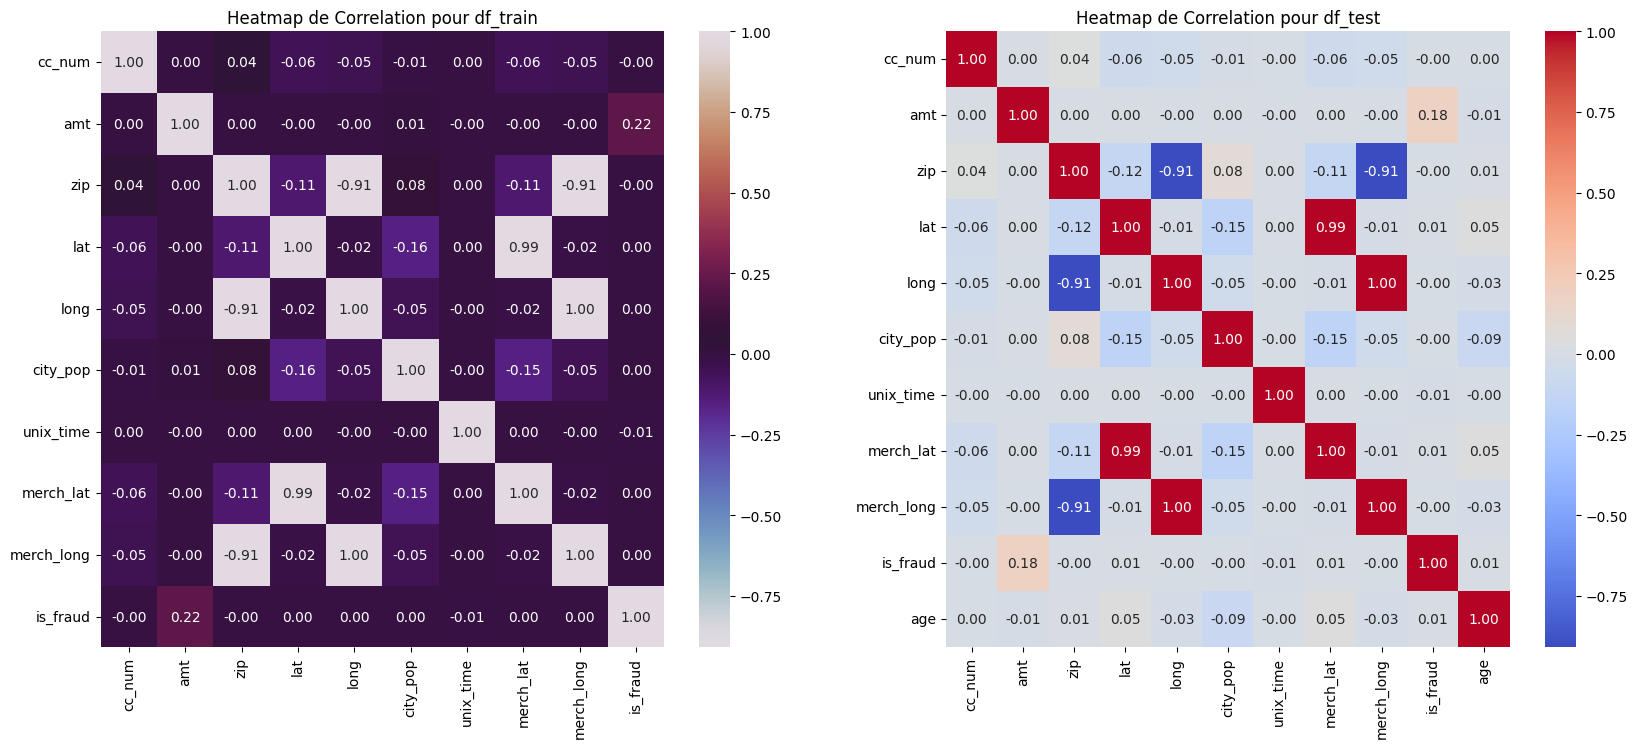

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap de corrélation pour df_train_numeric
sns.heatmap(df_train_numeric.corr(), annot=True, cmap='twilight', fmt=".2f", ax=axs[0])
axs[0].set_title('Heatmap de Correlation pour df_train')

# Heatmap de corrélation pour df_test_numeric
sns.heatmap(df_test_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1])
axs[1].set_title('Heatmap de Correlation pour df_test')

plt.show()

In [15]:
df_train_fraud_counts = df_train['is_fraud'].value_counts()
#df_test_fraud_counts = df_test['is_fraud'].value_counts()

fig = px.pie(names=["is_not_fraud", "is_fraud"], values=df_train_fraud_counts.values, title='Fraudulent Transactions Pie Chart of df_train',
            hover_data=[df_train_fraud_counts.values],
            labels={'value':'Count', 'percent':'Percentage'})

fig.show()

In [16]:
fraud_df = df_train[df_train['is_fraud'] == 1]
print("Number of fraud on df_train is {}".format(fraud_df.shape)) 
fraud_df.head()

Number of fraud on df_train is (7506, 28)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day,age
2449,4613314721966,Rutherford-Mertz,grocery_pos,281,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,36,-82,885,Soil scientist,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36,-81,1,2019,1,2,1,1988,9,15,31
2472,340187018810220,"Jenkins, Hauck and Friesen",gas_transport,12,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29,-98,1595797,Horticultural consultant,bc7d41c41103877b03232f03f1f8d3f5,1325468849,30,-99,1,2019,1,2,1,1960,10,28,59
2523,340187018810220,Goodwin-Nitzsche,grocery_pos,276,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29,-98,1595797,Horticultural consultant,b98f12f4168391b2203238813df5aa8c,1325473523,29,-99,1,2019,1,2,3,1960,10,28,59
2546,4613314721966,Erdman-Kertzmann,gas_transport,7,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,36,-82,885,Soil scientist,397894a5c4c02e3c61c784001f0f14e4,1325475483,36,-82,1,2019,1,2,3,1988,9,15,31
2553,340187018810220,Koepp-Parker,grocery_pos,276,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29,-98,1595797,Horticultural consultant,7863235a750d73a244c07f1fb7f0185a,1325476547,30,-99,1,2019,1,2,3,1960,10,28,59


In [17]:
print("Minimum trans_year:{}".format(df_train['trans_year'].min()))
print("Maximum trans_year:{}".format(df_train['trans_year'].max()))

Minimum trans_year:2019
Maximum trans_year:2020


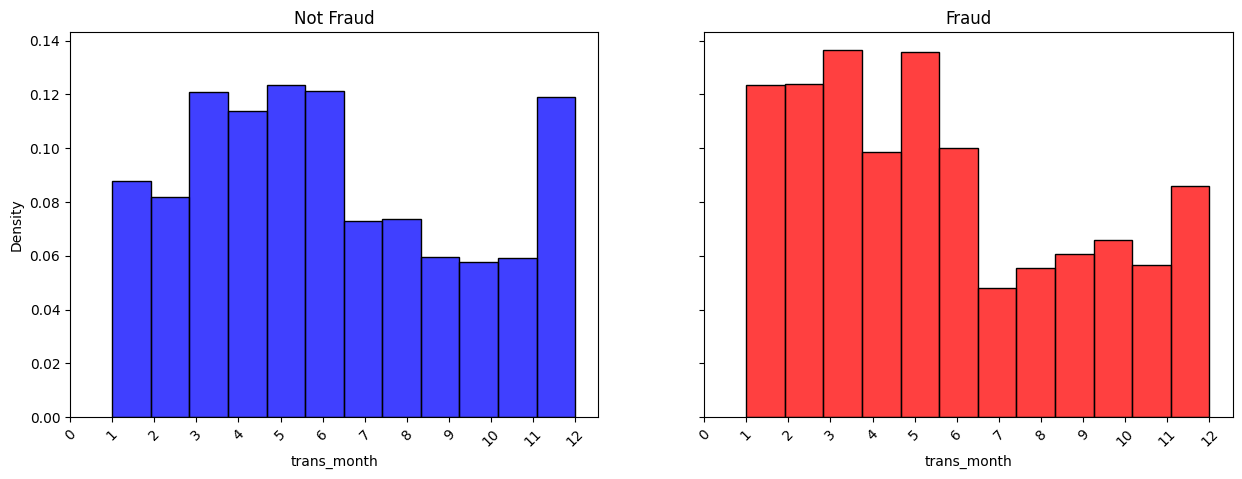

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='trans_month', data=df_train[df_train["is_fraud"] == 0], stat="density", bins=12, ax=ax1, color="blue")

ax2 = sns.histplot(x='trans_month', data=df_train[df_train["is_fraud"] == 1], stat="density", bins=12, ax=ax2, color="red")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(range(13))
ax1.set_xticklabels([str(i) for i in range(13)], rotation=45)
ax2.set_xticks(range(13))
ax2.set_xticklabels([str(i) for i in range(13)], rotation=45)

plt.show()

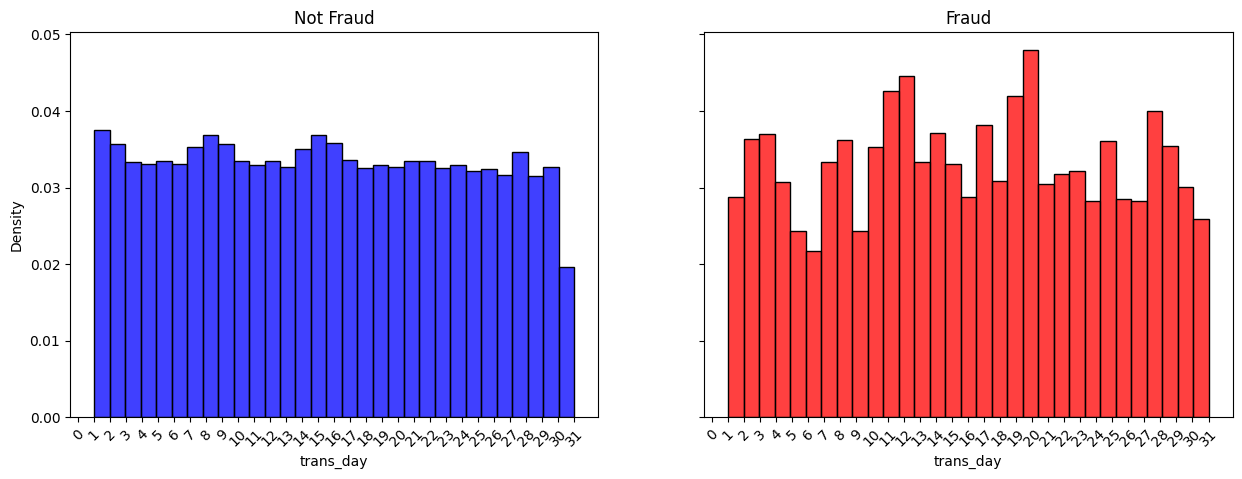

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='trans_day', data=df_train[df_train["is_fraud"] == 0], stat="density", bins=31, ax=ax1, color="blue")

ax2 = sns.histplot(x='trans_day', data=df_train[df_train["is_fraud"] == 1], stat="density", bins=31, ax=ax2, color="red")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(range(32))
ax1.set_xticklabels([str(i) for i in range(32)], rotation=45)
ax2.set_xticks(range(32))
ax2.set_xticklabels([str(i) for i in range(32)], rotation=45)

plt.show()

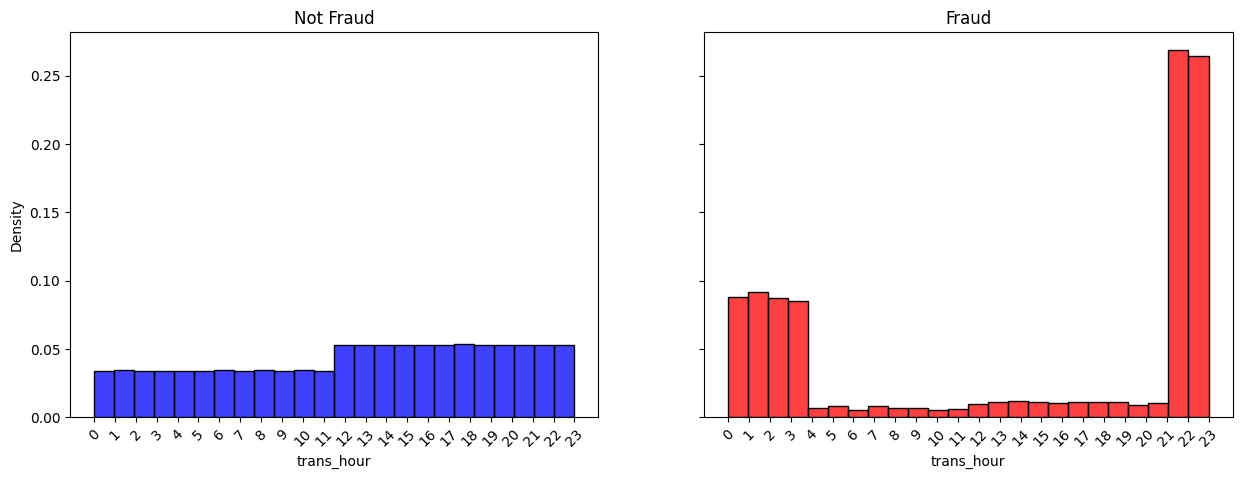

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='trans_hour', data=df_train[df_train["is_fraud"] == 0], stat="density", bins=24, ax=ax1, color="blue")

ax2 = sns.histplot(x='trans_hour', data=df_train[df_train["is_fraud"] == 1], stat="density", bins=24, ax=ax2, color="red")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(range(24))
ax1.set_xticklabels([str(i) for i in range(24)], rotation=45)
ax2.set_xticks(range(24))
ax2.set_xticklabels([str(i) for i in range(24)], rotation=45)

plt.show()

In [21]:
# Sélectionner un échantillon aléatoire de 10000 lignes
df_train_folium_sample = df_train.sample(n=1000)

# Créer une carte centrée sur une position initiale
df_train_folium = folium.Map(location=[df_train_folium_sample['lat'].mean(), df_train_folium_sample['long'].mean()], zoom_start=10)

# Ajouter des marqueurs pour chaque emplacement dans l'échantillon
for index, row in df_train_folium_sample.iterrows():
    # Marqueur bleu pour lat et lon
    folium.CircleMarker(location=[row['lat'], row['long']], color='blue', fill_color='blue').add_to(df_train_folium)
    # Marqueur rouge pour merch_lat et merch_lon
    folium.CircleMarker(location=[row['merch_lat'], row['merch_long']], color='red', fill_color='red').add_to(df_train_folium)

# Afficher la carte
df_train_folium

### Categorial values

In [22]:
df_train_cat = df_train.select_dtypes(include=['object'])
df_test_cat = df_test.select_dtypes(include=['object'])

list(df_train_cat)

['merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [23]:
pd.set_option('display.max_rows', None)

df_train_merchant_counts = df_train['merchant'].value_counts().reset_index()
df_train_merchant_counts.columns = ['merchant', 'occurrences']

# Afficher le nouveau DataFrame
df_train_merchant_counts.head(10)


,merchant,occurrences
0,Kilback LLC,4403
1,Cormier LLC,3649
2,Schumm PLC,3634
3,Kuhn LLC,3510
4,Boyer PLC,3493
5,Dickinson Ltd,3434
6,Cummerata-Jones,2736
7,Kutch LLC,2734
8,"Olson, Becker and Koch",2723
9,"Stroman, Hudson and Erdman",2721


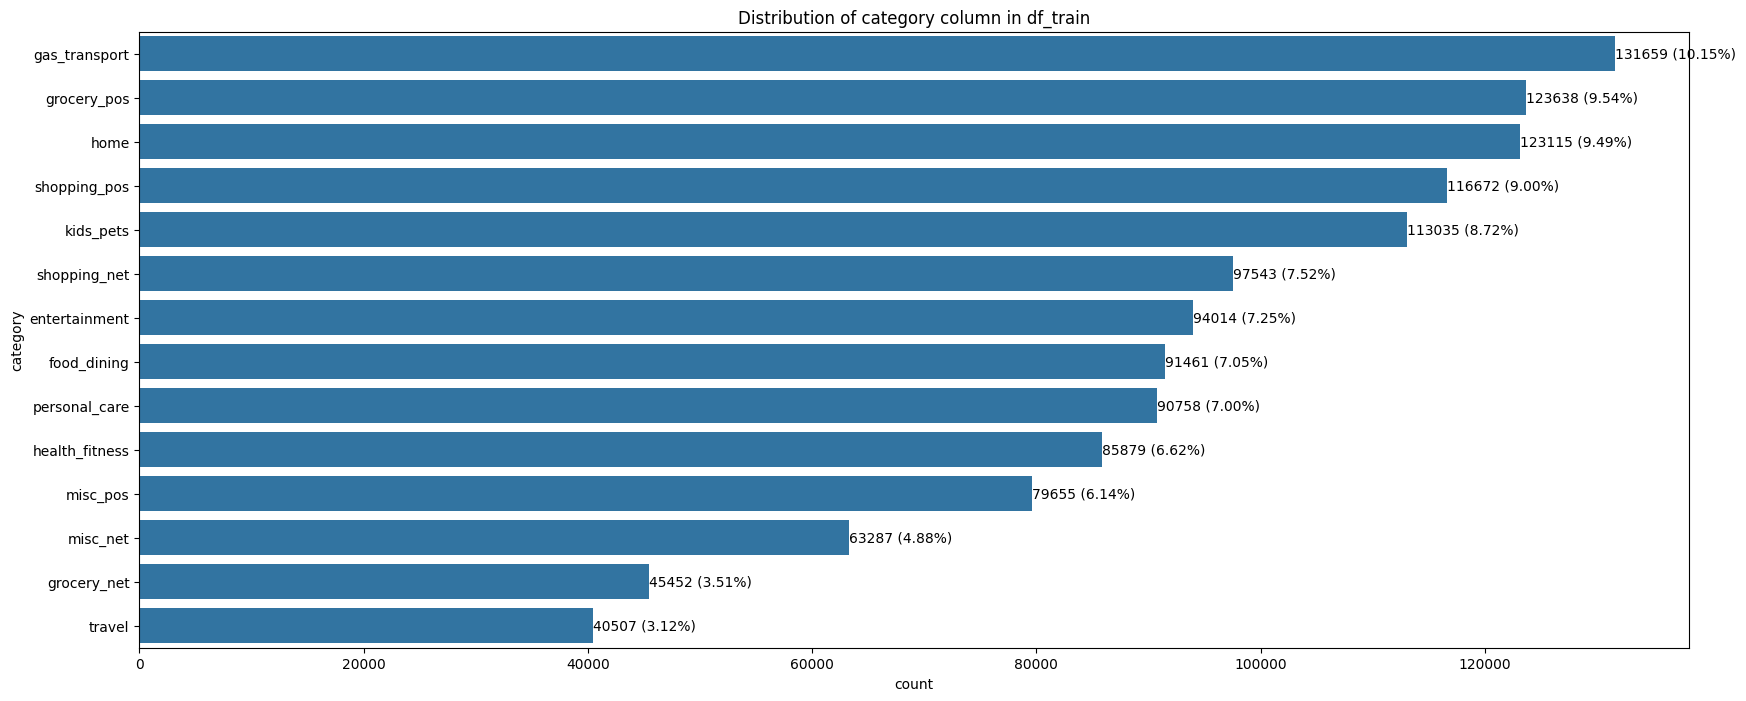

In [24]:
category_counts = df_train['category'].value_counts()

plt.figure(figsize=(20, 8))

sns.countplot(y='category', data=df_train, order=category_counts.index)
plt.title('Distribution of category column in df_train')

total_count = len(df_train['category'])
for index, value in enumerate(category_counts):
    percentage = (value / total_count) * 100
    plt.text(value, index, f'{value} ({percentage:.2f}%)', ha='left', va='center')

plt.show()


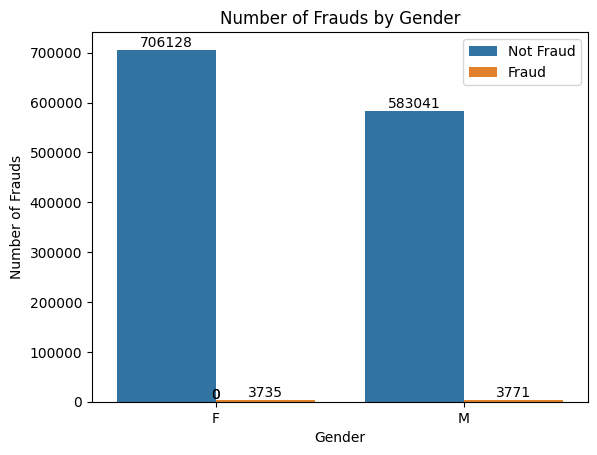

In [25]:
ax = sns.countplot(data=df_train, x='gender', hue='is_fraud')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')

plt.title('Number of Frauds by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Frauds')

plt.legend(labels=['Not Fraud', 'Fraud'])

plt.show()

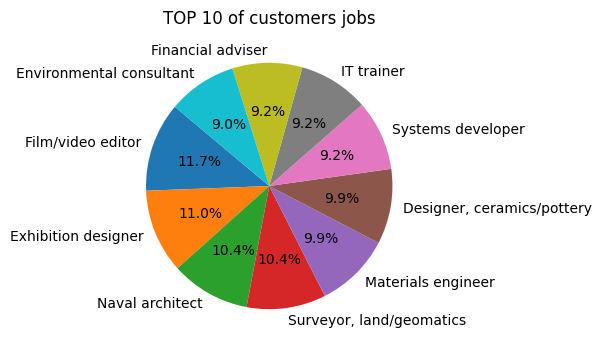

In [26]:
job_counts = df_train['job'].value_counts().head(10)

plt.figure(figsize=(4,4))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('TOP 10 of customers jobs')
plt.show()

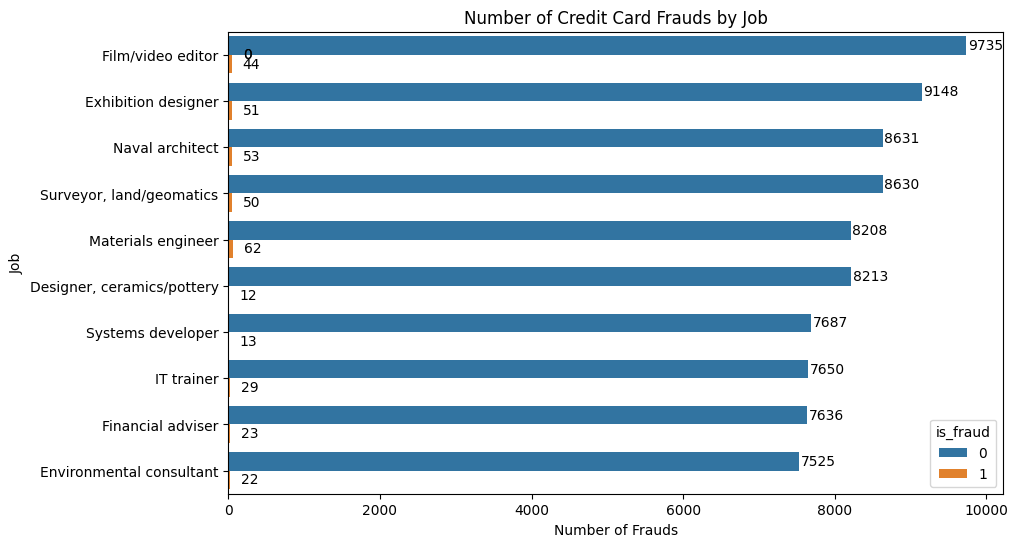

In [27]:
# TOP 10 of jobs associated with fraud
#df_train_job = df_train[df_train['is_fraud'] == 1]["job"].value_counts(sort=True, ascending=False).head(10)
#df_train_job.plot(kind="barh")
#plt.title("Top 10 Jobs Associated with Frauds")
#plt.ylabel("Job")
#plt.xlabel("Number of Frauds")
#plt.show()

# Number of Credit Card Frauds by Job
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, y='job', hue='is_fraud', order=df_train['job'].value_counts().index[:10])

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', 
                xytext = (14, 0), textcoords = 'offset points')

plt.title("Number of Credit Card Frauds by Job")
plt.xlabel("Number of Frauds")
plt.ylabel("Job")
plt.show()


In [28]:
df_train_city = df_train[df_train['is_fraud'] == 1]

# Sélectionner un échantillon aléatoire de 10000 lignes
df_train_folium_sample = df_train_city.sample(n=1000)

# Créer une carte centrée sur une position initiale
df_train_folium = folium.Map(location=[df_train_folium_sample['lat'].mean(), df_train_folium_sample['long'].mean()], zoom_start=10)

# Ajouter des marqueurs pour chaque emplacement dans l'échantillon
for index, row in df_train_folium_sample.iterrows():
    folium.Marker(location=[row['lat'], row['long']]).add_to(df_train_folium)

# Afficher la carte
df_train_folium

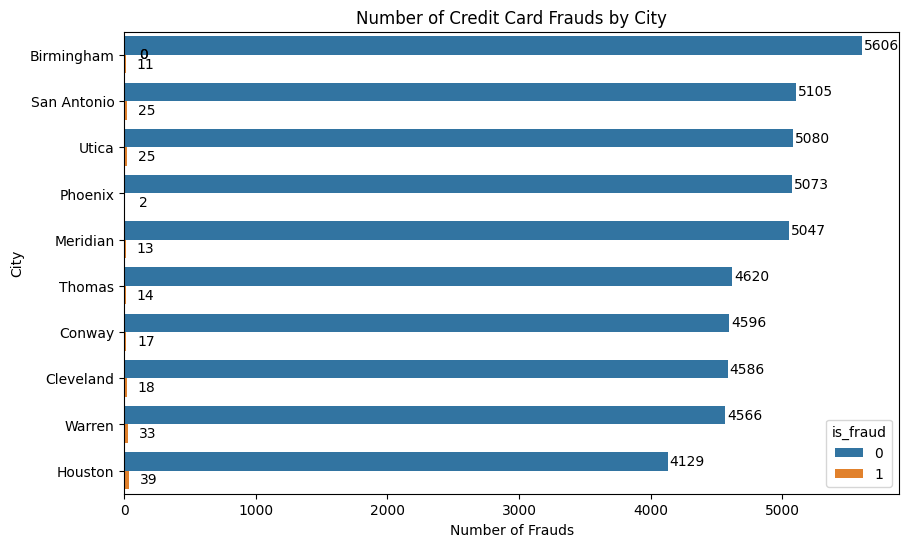

In [29]:
# TOP 10 of jobs associated with fraud
#df_train_city = df_train[df_train['is_fraud'] == 1]["city"].value_counts(sort=True, ascending=False).head(10)
#df_train_city.plot(kind="barh")
#plt.title("Top 10 City Associated with Frauds")
#plt.ylabel("City")
#plt.xlabel("Number of Frauds")
#plt.show()

# Number of Credit Card Frauds by Job
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, y='city', hue='is_fraud', order=df_train['city'].value_counts().index[:10])

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', 
                xytext = (14, 0), textcoords = 'offset points')

plt.title("Number of Credit Card Frauds by City")
plt.xlabel("Number of Frauds")
plt.ylabel("City")
plt.show()

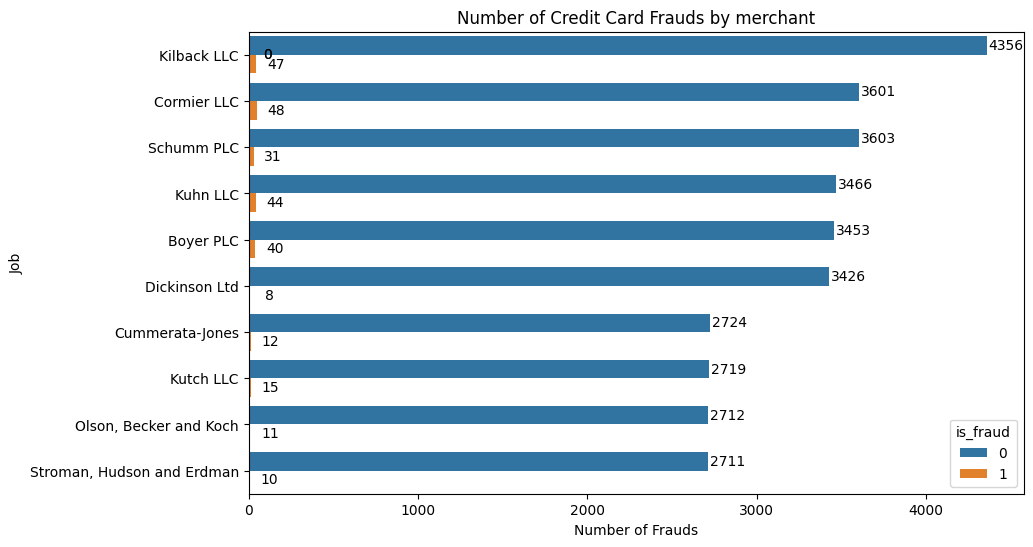

In [30]:
# Number of Credit Card Frauds by Job
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, y='merchant', hue='is_fraud', order=df_train['merchant'].value_counts().index[:10])

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', 
                xytext = (14, 0), textcoords = 'offset points')

plt.title("Number of Credit Card Frauds by merchant")
plt.xlabel("Number of Frauds")
plt.ylabel("Job")
plt.show()

## Selection of columns : 
    The fraud detection models focus on features that are directly related to transactions or suspicious behaviors.

In [31]:
selected_columns = ['cc_num', 'merchant', 'category', 'amt', 'gender',
        'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
        'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'dob_year',
        'dob_month', 'dob_day', 'age']
df_train = df_train[selected_columns]
print("Shape of slected colmumns for df_train is {}".format(df_train.shape))
df_train.head()


Shape of slected colmumns for df_train is (1296675, 24)


,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day,age
0,2703186189652095,"Rippin, Kub and Mann",misc_net,5,F,Moravian Falls,NC,28654,36,-81,3495,"Psychologist, counselling",1325376018,36,-82,0,2019,1,1,0,1988,3,9,31
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107,F,Orient,WA,99160,49,-118,149,Special educational needs teacher,1325376044,49,-118,0,2019,1,1,0,1978,6,21,41
2,38859492057661,Lind-Buckridge,entertainment,220,M,Malad City,ID,83252,42,-112,4154,Nature conservation officer,1325376051,43,-112,0,2019,1,1,0,1962,1,19,57
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45,M,Boulder,MT,59632,46,-112,1939,Patent attorney,1325376076,47,-113,0,2019,1,1,0,1967,1,12,52
4,375534208663984,Keeling-Crist,misc_pos,42,M,Doe Hill,VA,24433,38,-79,99,Dance movement psychotherapist,1325376186,39,-79,0,2019,1,1,0,1986,3,28,33


# 3. Data preprocessing

In [32]:
encodeur = LabelEncoder()
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = encodeur.fit_transform(df_train[column])

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  int64  
 2   category     1296675 non-null  int64  
 3   amt          1296675 non-null  float64
 4   gender       1296675 non-null  int64  
 5   city         1296675 non-null  int64  
 6   state        1296675 non-null  int64  
 7   zip          1296675 non-null  int64  
 8   lat          1296675 non-null  float64
 9   long         1296675 non-null  float64
 10  city_pop     1296675 non-null  int64  
 11  job          1296675 non-null  int64  
 12  unix_time    1296675 non-null  int64  
 13  merch_lat    1296675 non-null  float64
 14  merch_long   1296675 non-null  float64
 15  is_fraud     1296675 non-null  int64  
 16  trans_year   1296675 non-null  int32  
 17  trans_month  1296675 non-null  int32  
 18  tr

In [34]:
rows_with_negative_values = df_train[(df_train < 0).any(axis=1)]

print("Rows with negative values :")
rows_with_negative_values.head(10)

Rows with negative values :


,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day,age
0,2703186189652095,514,8,5,0,526,27,28654,36,-81,3495,370,1325376018,36,-82,0,2019,1,1,0,1988,3,9,31
1,630423337322,241,4,107,0,612,47,99160,49,-118,149,428,1325376044,49,-118,0,2019,1,1,0,1978,6,21,41
2,38859492057661,390,0,220,1,468,13,83252,42,-112,4154,307,1325376051,43,-112,0,2019,1,1,0,1962,1,19,57
3,3534093764340240,360,2,45,1,84,26,59632,46,-112,1939,328,1325376076,47,-113,0,2019,1,1,0,1967,1,12,52
4,375534208663984,297,9,42,1,216,45,24433,38,-79,99,116,1325376186,39,-79,0,2019,1,1,0,1986,3,28,33
5,4767265376804500,607,2,95,0,223,38,18917,40,-75,2158,479,1325376248,41,-76,0,2019,1,1,0,1961,6,19,58
6,30074693890476,534,3,45,0,351,16,67851,38,-101,2691,29,1325376282,37,-100,0,2019,1,1,0,1993,8,16,26
7,6011360759745864,107,2,72,1,236,45,22824,39,-79,6018,127,1325376308,39,-79,0,2019,1,1,0,1947,8,21,72
8,4922710831011201,250,9,4,0,474,38,15665,40,-80,1472,375,1325376318,40,-80,0,2019,1,1,0,1941,3,7,78
9,2720830304681674,563,4,198,0,149,42,37040,37,-87,151785,329,1325376361,37,-87,0,2019,1,1,0,1974,3,28,45


# 4. Construction of Naive Bayes model

In [35]:
X = df_train.drop('is_fraud', axis=1)  
y = df_train['is_fraud'] 

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1037340, 23)
y_train shape: (1037340,)
X_test shape: (259335, 23)
y_test shape: (259335,)


In [38]:
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)


GaussianNB()

In [39]:
bernoullinb = BernoulliNB()
bernoullinb.fit(X_train, y_train)

BernoulliNB()

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [57]:
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# 5. Evauation of Naive Bayes

## GaussianNB

In [40]:
#Prediction for X_test
y_pred = gaussiannb.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.990483351649411

Precision: 0.2935510887772194
Recall: 0.47300944669365724
F1-score: 0.36227390180878555

Confusion Matrix:
[[256166   1687]
 [   781    701]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257853
           1       0.29      0.47      0.36      1482

    accuracy                           0.99    259335
   macro avg       0.65      0.73      0.68    259335
weighted avg       0.99      0.99      0.99    259335



- **Accuracy**: The model correctly classified approximately 98.82% of all transactions in the test set as fraudulent or non-fraudulent.

- **Precision**: Among all transactions predicted as fraudulent by the model, approximately 24.34% were actually fraudulent.

- **Recall**: The model successfully identified around 47.43% of all fraudulent transactions present in the test set.

- **F1-score**: The F1-score, which combines precision and recall into a single metric, is 32.17% for the fraudulent transactions class, indicating a trade-off between precision and recall.

- **Confusion Matrix**: We have 255537 true negatives (correctly classified non-fraudulent transactions), 2263 false positives (non-fraudulent transactions predicted as fraudulent), 807 false negatives (fraudulent transactions predicted as non-fraudulent), and 728 true positives (correctly classified fraudulent transactions).

## BernouilliNB

In [41]:
#Prediction for X_test
y_pred = bernoullinb.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9942853837700272

Precision: 0.0
Recall: 0.0
F1-score: 0.0

Confusion Matrix:
[[257853      0]
 [  1482      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257853
           1       0.00      0.00      0.00      1482

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



## LogicRegression

In [58]:
#Prediction for X_test
y_pred = lr.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9956182969840927

Precision: 0.0
Recall: 0.0
F1-score: 0.0

Confusion Matrix:
[[110657     33]
 [   454      0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110690
           1       0.00      0.00      0.00       454

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



# Test model on test.csv

In [42]:
print(df_test.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'dob_year',
       'dob_month', 'dob_day', 'age'],
      dtype='object')


In [45]:
selected_columns = ['cc_num', 'merchant', 'category', 'amt', 'gender',
        'lat', 'long', 'job', 'is_fraud', 'merch_lat', 'merch_long',
        'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'dob_year',
        'dob_month', 'dob_day', 'age']
df_test = df_test[selected_columns]
print("Shape of slected colmumns for df_test is {}".format(df_test.shape))
df_test.head()

Shape of slected colmumns for df_test is (555719, 19)


,cc_num,merchant,category,amt,gender,lat,long,job,is_fraud,merch_lat,merch_long,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day,age
0,2291163933867244,Kirlin and Sons,personal_care,3,M,34,-81,Mechanical engineer,0,34,-81,2020,6,21,12,1968,3,19,51
1,3573030041201292,Sporer-Keebler,personal_care,30,F,40,-110,"Sales professional, IT",0,39,-110,2020,6,21,12,1990,1,17,29
2,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41,F,41,-74,"Librarian, public",0,40,-74,2020,6,21,12,1970,10,21,49
3,3591919803438423,Haley Group,misc_pos,60,M,29,-81,Set designer,0,29,-81,2020,6,21,12,1987,7,25,32
4,3526826139003047,Johnston-Casper,travel,3,M,44,-85,Furniture designer,0,45,-86,2020,6,21,12,1955,7,6,64


In [46]:
encodeur = LabelEncoder()
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        df_test[column] = encodeur.fit_transform(df_test[column])

In [47]:
X = df_test.drop('is_fraud', axis=1)  
y = df_test['is_fraud'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)

bernoullinb = BernoulliNB()
bernoullinb.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

X_train shape: (444575, 18)
y_train shape: (444575,)
X_test shape: (111144, 18)
y_test shape: (111144,)


LogisticRegression()

In [48]:
#Prediction for X_test
y_pred = gaussiannb.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9923882530770892

Precision: 0.2543859649122807
Recall: 0.44713656387665196
F1-score: 0.3242811501597444

Confusion Matrix:
[[110095    595]
 [   251    203]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    110690
           1       0.25      0.45      0.32       454

    accuracy                           0.99    111144
   macro avg       0.63      0.72      0.66    111144
weighted avg       0.99      0.99      0.99    111144



In [49]:
#Prediction for X_test
y_pred = bernoullinb.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9959152090981069

Precision: 0.0
Recall: 0.0
F1-score: 0.0

Confusion Matrix:
[[110690      0]
 [   454      0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110690
           1       0.00      0.00      0.00       454

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [50]:
#Prediction for X_test
y_pred = lr.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9956182969840927

Precision: 0.0
Recall: 0.0
F1-score: 0.0

Confusion Matrix:
[[110657     33]
 [   454      0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110690
           1       0.00      0.00      0.00       454

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



________________________________________________________________________________________________________________

In [51]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [52]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [53]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[440481   2403]
 [   892    799]]
test-set confusion matrix:
 [[110095    595]
 [   251    203]]
recall score:  0.44713656387665196
precision score:  0.2543859649122807
f1 score:  0.3242811501597444
accuracy score:  0.9923882530770892
ROC AUC: 0.8825329739801955


In [54]:
y_pred, y_pred_prob = get_predictions(LogisticRegression(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[442755    129]
 [  1691      0]]
test-set confusion matrix:
 [[110657     33]
 [   454      0]]
recall score:  0.0
precision score:  0.0
f1 score:  0.0
accuracy score:  0.9956182969840927
ROC AUC: 0.8000830194896807


In [32]:
drop_list = ['city', 'state','zip', 'city_pop', 'merch_lat', 'merch_long',]

def split_data(df, drop_list):
    X = df_test.drop(drop_list, axis=1)
    y = df_test['is_fraud']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [33]:
X_train, X_test, y_train, y_test = split_data(df_test, drop_list)
y_pred, y_pred_prob = get_predictions(BernoulliNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[442853      0]
 [     0   1722]]
test-set confusion matrix:
 [[110721      0]
 [     0    423]]
recall score:  1.0
precision score:  1.0
f1 score:  1.0
accuracy score:  1.0
ROC AUC: 1.0
